In [1]:
import pandas as pd
import pandas as pd
import numpy as np
from nba_api.stats.static import players

import time 
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def team_dict(team):

    map={'SYR': '1610612755',
     'PHW': '1610612744',
     'NYK': '1610612752',
     'STL': '1610612737',
     'ROC': '1610612758',
     'BOS': '1610612738',
     'FTW': '1610612765',
     'MNL': '1610612747',
     'TOT': 'TOT',
     'DET': '1610612765',
     'CIN': '1610612758',
     'LAL': '1610612747',
     'CHP': '1610612741',
     'SFW': '1610612744',
     'CHZ': '1610612741',
     'BAL': '1610612764',
     'PHI': '1610612755',
     'CHI': '1610612741',
     'SDR': '1610612745',
     'SEA': '1610612760',
     'MIL': '1610612749',
     'ATL': '1610612737',
     'PHO': '1610612756',
     'POR': '1610612757',
     'CLE': '1610612739',
     'BUF': '1610612761',
     'HOU': '1610612745',
     'GSW': '1610612744',
     'KCO': '1610612758',
     'CAP': '1610612764',
     'NOJ': '1610612762',
     'WSB': '1610612764',
     'KCK': '1610612758',
     'IND': '1610612754',
     'NYN': '1610612751',
     'DEN': '1610612743',
     'SAS': '1610612759',
     'NJN': '1610612751',
     'SDC': '1610612746',
     'UTA': '1610612762',
     'DAL': '1610612742',
     'LAC': '1610612746',
     'SAC': '1610612758',
     'CHH': '1610612766',
     'MIA': '1610612748',
     'ORL': '1610612753',
     'MIN': '1610612750',
     'VAN': '1610612763',
     'TOR': '1610612761',
     'WAS': '1610612764',
     'MEM': '1610612763',
     'NOH': '1610612740',
     'CHA': '1610612766',
     'NOK': '1610612740',
     'OKC': '1610612760',
     'BRK': '1610612751',
     'NOP': '1610612740',
     'CHO': '1610612766',
     'PHX': '1610612756'}
    return map[team]

def calculate_basketball_percentages(df):
    """
    Calculate basketball percentage statistics from raw totals.
    
    Args:
        df (pandas.DataFrame): DataFrame containing the raw totals columns
        
    Returns:
        pandas.DataFrame: DataFrame with added percentage columns
    """
    # Make a copy to avoid modifying the original
    result = df.copy()
    
    # Basic shooting percentages
    result['Fg3Pct'] = (result['FG3M'] / result['FG3A'] * 1).fillna(0)
    result['Fg2Pct'] = (result['FG2M'] / result['FG2A'] * 1).fillna(0)
    result['FGA'] = (result['FG2A'] + result['FG3A'])
    result['PenaltyFGA'] = (result['PenaltyFG2A'] + result['PenaltyFG3A'])
    result['SecondChanceFGA'] = (result['SecondChanceFG2A'] + result['SecondChanceFG3A'])

    result['FGA']= result['FG2A']+result['FG3A']
    result['FGM']= result['FG2M']+result['FG3M']
    result['NonHeaveFg3Pct'] = (result['FG3M'] / (result['FG3A']-result['HeaveAttempts']) * 1).fillna(0)
    
    # Advanced shooting percentages
    result['EfgPct'] = ((result['FG2M'] + 1.5 * result['FG3M']) / (result['FG2A'] + result['FG3A']) * 1).fillna(0)
    # Assuming you have a DataFrame named result with the necessary columns
    
    # Step 1: Extract relevant columns for easier calculations
    points = result['Points']
    fga = result['FGA']
    fta = result['FTA']
    and1_2pt = result['2pt And 1 Free Throw Trips']
    and1_3pt = result['3pt And 1 Free Throw Trips']
    
    # Step 2: Calculate the adjusted free throw weighting factor
    w = (and1_2pt + 1.5 * and1_3pt + 0.44 * (fta - and1_2pt - and1_3pt)) / fta
    
    # Step 3: Calculate True Shooting Percentage (TS%) and add to result DataFrame
    result['TsPct'] = points / (2 * (fga + w * fta))
    
    # The 'TS%' column in the result DataFrame now contains the calculated TS% values

    #result['TsPct'] = (result['Points'] / (2 * (result['FG2A'] + result['FG3A'] + 0.44 * result['FTA'])) * 1).fillna(0)
    
    # Second chance percentages
    result['SecondChanceFg3Pct'] = (result['SecondChanceFG3M'] / result['SecondChanceFG3A'] * 1).fillna(0)
    result['SecondChanceFg2Pct'] = (result['SecondChanceFG2M'] / result['SecondChanceFG2A'] * 1).fillna(0)
    result['SecondChanceEfgPct'] = ((result['SecondChanceFG2M'] + 1.5 * result['SecondChanceFG3M']) / 
                                   (result['SecondChanceFG2A'] + result['SecondChanceFG3A']) * 1).fillna(0)
    result['SecondChanceTsPct'] = (result['SecondChancePoints'] / 
                                  (2 * (result['SecondChanceFG2A'] + result['SecondChanceFG3A'])) * 1).fillna(0)

    
    result['SecondChancePointsPct'] = (result['SecondChancePoints'] / result['Points'] * 1).fillna(0)
    
    # Shot distribution
    result['FG3APct'] = (result['FG3A'] / (result['FG2A'] + result['FG3A']) * 1).fillna(0)
    
    result['FG2APctBlocked'] = (result['Fg2aBlocked'] / result['FG2A'] * 1).fillna(0)
    result['AtRimPctBlocked'] = (result['opp_BlockedAtRim'] / result['AtRimFGA'] * 1).fillna(0)
    result['LongMidRangePctBlocked'] = (result['opp_BlockedLongMidRange'] / result['LongMidRangeFGA'] * 1).fillna(0)
    result['ShortMidRangePctBlocked'] = (result['opp_BlockedShortMidRange'] / result['ShortMidRangeFGA'] * 1).fillna(0)
    result['FG3APctBlocked'] = (result['Fg3aBlocked'] / result['FG3A'] * 1).fillna(0)
    result['Corner3PctBlocked'] = (result['Blocked3s'] / result['Corner3FGA'] * 1).fillna(0)
    result['Arc3PctBlocked'] = (result['Blocked3s'] / result['Arc3FGA'] * 1).fillna(0)
    
    # Rebound percentages - Field Goals (corrected to be relative to missed shots)
    result['DefFGReboundPct'] = (result['DefRebounds'] / (result['opp_FG2A'] - result['opp_FG2M'] + result['opp_FG3A'] - result['opp_FG3M']) * 1).fillna(0)
    result['OffFGReboundPct'] = (result['OffRebounds'] / (result['FG2A'] - result['FG2M'] + result['FG3A'] - result['FG3M']) * 1).fillna(0)
    
    # Rebound percentages by shot location (corrected to be relative to missed shots of that type)
    result['OffLongMidRangeReboundPct'] = (result['OffTwoPtRebounds'] / (result['LongMidRangeFGA'] - result['LongMidRangeFGM']) * 1).fillna(0)
    result['DefLongMidRangeReboundPct'] = (result['DefTwoPtRebounds'] / (result['LongMidRangeFGA'] - result['LongMidRangeFGM']) * 1).fillna(0)
    result['DefArc3ReboundPct'] = (result['DefThreePtRebounds'] / (result['Arc3FGA'] - result['Arc3FGM']) * 1).fillna(0)
    result['OffArc3ReboundPct'] = (result['OffThreePtRebounds'] / (result['Arc3FGA'] - result['Arc3FGM']) * 1).fillna(0)
    result['DefAtRimReboundPct'] = (result['DefTwoPtRebounds'] / (result['AtRimFGA'] - result['AtRimFGM']) * 1).fillna(0)
    result['OffAtRimReboundPct'] = (result['OffTwoPtRebounds'] / (result['AtRimFGA'] - result['AtRimFGM']) * 1).fillna(0)
    result['DefShortMidRangeReboundPct'] = (result['DefTwoPtRebounds'] / (result['ShortMidRangeFGA'] - result['ShortMidRangeFGM']) * 1).fillna(0)
    result['OffShortMidRangeReboundPct'] = (result['OffTwoPtRebounds'] / (result['ShortMidRangeFGA'] - result['ShortMidRangeFGM']) * 1).fillna(0)
    result['DefCorner3ReboundPct'] = (result['DefThreePtRebounds'] / (result['Corner3FGA'] - result['Corner3FGM']) * 1).fillna(0)
    result['OffCorner3ReboundPct'] = (result['OffThreePtRebounds'] / (result['Corner3FGA'] - result['Corner3FGM']) * 1).fillna(0)
    
    # Free throw rebound percentages (corrected to be relative to FT misses)

    # Assist percentages
    result['Assisted2sPct'] = (result['PtsAssisted2s'] / (2 * result['FG2M']) * 1).fillna(0)
    result['Assisted3sPct'] = (result['PtsAssisted3s'] / (3 * result['FG3M']) * 1).fillna(0)
    result['NonPutbacksAssisted2sPct'] = (result['PtsAssisted2s'] / (2 * (result['FG2M'] - result['PtsPutbacks']/2)) * 1).fillna(0)
    result['Corner3PctAssisted'] = (result['Corner3Assists'] / result['Corner3FGM'] * 1).fillna(0)
    result['Arc3PctAssisted'] = (result['Arc3Assists'] / result['Arc3FGM'] * 1).fillna(0)
    result['SecondChanceCorner3PctAssisted'] = (result['Corner3Assists'] / result['SecondChanceCorner3FGM'] * 1).fillna(0)
    result['SecondChanceArc3PctAssisted'] = (result['Arc3Assists'] / result['SecondChanceArc3FGM'] * 1).fillna(0)
    result['SecondChanceAtRimPctAssisted'] = (result['AtRimAssists'] / result['SecondChanceAtRimFGM'] * 1).fillna(0)
    result['AtRimPctAssisted'] = (result['AtRimAssists'] / result['AtRimFGM'] * 1).fillna(0)
    result['ShortMidRangePctAssisted'] = (result['ShortMidRangeAssists'] / result['ShortMidRangeFGM'] * 1).fillna(0)
    result['LongMidRangePctAssisted'] = (result['LongMidRangeAssists'] / result['LongMidRangeFGM'] * 1).fillna(0)
    
    # Penalty percentages
    result['PenaltyPointsPct'] = (result['PenaltyPoints'] / result['Points'] * 1).fillna(0)
    result['PenaltyOffPossPct'] = (result['PenaltyOffPoss'] / result['OffPoss'] * 1).fillna(0)
    result['PenaltyFg2Pct'] = (result['PenaltyFG2M'] / result['PenaltyFG2A'] * 1).fillna(0)
    result['PenaltyFg3Pct'] = (result['PenaltyFG3M'] / result['PenaltyFG3A'] * 1).fillna(0)
    result['PenaltyEfgPct'] = ((result['PenaltyFG2M'] + 1.5 * result['PenaltyFG3M']) / 
                              (result['PenaltyFG2A'] + result['PenaltyFG3A']) * 1).fillna(0)
    result['PenaltyTsPct'] = (result['PenaltyPoints'] / 
                             (2 * (result['PenaltyFG2A'] + result['PenaltyFG3A'] + 0.44 * result['FTA'])) * 1).fillna(0)
    
    # Miscellaneous percentages
    result['BlocksRecoveredPct'] = (result['RecoveredBlocks'] / result['Blocks'] * 1).fillna(0)
    result['LiveBallTurnoverPct'] = (result['LiveBallTurnovers'] / result['Turnovers'] * 1).fillna(0)
    result['SelfORebPct'] = (result['SelfOReb'] /(result['FGA']- result['FGM']) * 1).fillna(0)
    
    # Fouls percentages
    total_shooting_fouls = result['TwoPtShootingFoulsDrawn'] + result['ThreePtShootingFoulsDrawn']
    result['ShootingFoulsDrawnPct'] = (result['ShootingFouls'] / (result['FG2A']+result['FG3A']) * 1).fillna(0)
    result['TwoPtShootingFoulsDrawnPct'] = ((result['TwoPtShootingFoulsDrawn'])/ (result['FG2A']+result['2pt And 1 Free Throw Trips'])* 1).fillna(0)
    result['ThreePtShootingFoulsDrawnPct'] = (result['ThreePtShootingFoulsDrawn'] / result['FG3A'] * 1).fillna(0)
    total_def_rebounds = result['DefTwoPtRebounds'] + result['DefThreePtRebounds']
    total_off_rebounds = result['OffTwoPtRebounds'] + result['OffThreePtRebounds']
    result['ThreePtShootingFoulsDrawnPct'] = result['ThreePtShootingFoulsDrawn'] / result['FG3A'] * 1
    
    result['DefTwoPtReboundPct'] = (result['DefTwoPtRebounds'] / total_def_rebounds * 1).fillna(0)
    result['DefThreePtReboundPct'] = (result['DefThreePtRebounds'] / total_def_rebounds * 1).fillna(0)
    result['OffTwoPtReboundPct'] = (result['OffTwoPtRebounds'] /(result['FG2A']-result['FG2M']) * 1).fillna(0)
    result['OffThreePtReboundPct'] = (result['OffThreePtRebounds'] / total_off_rebounds * 1).fillna(0)
    
    result['OffFTReboundPct']=(result['FTOffRebounds']/(result['opp_FTDefRebounds']+result['FTOffRebounds']))

    result['DefFTReboundPct']=(result['FTDefRebounds']/(result['opp_FTOffRebounds']+result['FTDefRebounds']))
    result['AtRimFrequency'] = result['AtRimFGA'] / result['FGA']
    result['ShortMidRangeFrequency'] = result['ShortMidRangeFGA'] / result['FGA']
    result['LongMidRangeFrequency'] = result['LongMidRangeFGA'] / result['FGA']
    result['Corner3Frequency'] = result['Corner3FGA'] / result['FGA']
    result['Arc3Frequency'] = result['Arc3FGA'] / result['FGA']
    result['SecondChanceArc3Frequency'] = result['SecondChanceArc3FGA'] / result['SecondChanceFGA']
    result['AtRimFG3AFrequency'] = (result['AtRimFGA'] + result['FG3A']) / result['FGA']
    result['SecondChanceAtRimFrequency'] = result['SecondChanceAtRimFGA'] / result['SecondChanceFGA']
    result['SecondChanceCorner3Frequency'] = result['SecondChanceCorner3FGA'] / result['SecondChanceFGA']
    result['PenaltyAtRimFrequency'] = result['PenaltyAtRimFGA'] / result['PenaltyFGA']
    result['PenaltyArc3Frequency'] = result['PenaltyArc3FGA'] / result['PenaltyFGA']
    result['PenaltyCorner3Frequency'] = result['PenaltyCorner3FGA'] / result['PenaltyFGA']
    # Calculating accuracy metrics
    result['AtRimAccuracy'] = result['AtRimFGM'] / result['AtRimFGA']
    result['UnblockedAtRimAccuracy'] = (result['AtRimFGM'] - result['Fg2aBlocked']) / result['AtRimFGA']
    
    result['ShortMidRangeAccuracy'] = result['ShortMidRangeFGM'] / result['ShortMidRangeFGA']
    result['UnblockedShortMidRangeAccuracy'] = (result['ShortMidRangeFGM'] - result['Fg2aBlocked']) / result['ShortMidRangeFGA']
    
    result['LongMidRangeAccuracy'] = result['LongMidRangeFGM'] / result['LongMidRangeFGA']
    result['UnblockedLongMidRangeAccuracy'] = (result['LongMidRangeFGM'] - result['Fg2aBlocked']) / result['LongMidRangeFGA']
    
    result['Corner3Accuracy'] = result['Corner3FGM'] / result['Corner3FGA']
    result['UnblockedCorner3Accuracy'] = (result['Corner3FGM'] - result['Fg3aBlocked']) / result['Corner3FGA']
    
    result['Arc3Accuracy'] = result['Arc3FGM'] / result['Arc3FGA']
    result['UnblockedArc3Accuracy'] = (result['Arc3FGM'] - result['Fg3aBlocked']) / result['Arc3FGA']
    
    # Second-chance accuracy metrics
    result['SecondChanceAtRimAccuracy'] = result['SecondChanceAtRimFGM'] / result['SecondChanceAtRimFGA']
    result['SecondChanceCorner3Accuracy'] = result['SecondChanceCorner3FGM'] / result['SecondChanceCorner3FGA']
    result['SecondChanceArc3Accuracy'] = result['SecondChanceArc3FGM'] / result['SecondChanceArc3FGA']
    
    # Penalty accuracy metrics
    result['PenaltyAtRimAccuracy'] = result['PenaltyAtRimFGM'] / result['PenaltyAtRimFGA']
    result['PenaltyCorner3Accuracy'] = result['PenaltyCorner3FGM'] / result['PenaltyCorner3FGA']
    result['PenaltyArc3Accuracy'] = result['PenaltyArc3FGM'] / result['PenaltyArc3FGA']
    
    # Non-heave accuracy metric
    result['NonHeaveArc3Accuracy'] = result['NonHeaveArc3FGM'] / result['NonHeaveArc3FGA']


    return result

def calculate_weighted_average(df, value_col, weight_col, group_by=None):
    """
    Calculate weighted average of a value column based on a weight column.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe
    value_col : str
        Name of the column containing the values to average
    weight_col : str
        Name of the column containing the weights
    group_by : str or list, optional
        Column(s) to group by before calculating weighted average
        
    Returns:
    --------
    If group_by is None: returns a float (weighted average)
    If group_by is specified: returns a Series with weighted averages per group
    
    Examples:
    --------
    # Single weighted average
    df = pd.DataFrame({
        'value': [10, 20, 30],
        'weight': [1, 2, 3]
    })
    result = calculate_weighted_average(df, 'value', 'weight')
    
    # Grouped weighted averages
    df = pd.DataFrame({
        'category': ['A', 'A', 'B', 'B'],
        'value': [10, 20, 30, 40],
        'weight': [1, 2, 3, 4]
    })
    result = calculate_weighted_average(df, 'value', 'weight', 'category')
    """
    
    # Input validation
    if value_col not in df.columns:
        raise ValueError(f"Value column '{value_col}' not found in dataframe")
    if weight_col not in df.columns:
        raise ValueError(f"Weight column '{weight_col}' not found in dataframe")
    
    # Handle negative weights
    if (df[weight_col] < 0).any():
        raise ValueError("Negative weights found. Please ensure all weights are non-negative")
    
    # Remove rows where either value or weight is null
    df = df.dropna(subset=[value_col, weight_col])
    
    # If all weights are zero, return nan
    if (df[weight_col] == 0).all():
        print('hit zero condition')
        return np.nan
    
    if group_by is None:
        # Calculate single weighted average
        weighted_sum = (df[value_col] * df[weight_col]).sum()
        weight_sum = df[weight_col].sum()
        return weighted_sum / weight_sum if weight_sum != 0 else np.nan
    else:
        # Calculate grouped weighted averages
        grouped = df.groupby(group_by)
        weighted_sums = grouped.apply(lambda x: (x[value_col] * x[weight_col]).sum())
        weight_sums = grouped[weight_col].sum()
        weight_sum = df[weight_col].sum()
        return weighted_sums / weight_sum


def transform_data(df):
    df.fillna(0, inplace=True)
    
    id_col=['EntityId',
     'TeamId',
     'Name',
     'ShortName',
     'RowId',
     'TeamAbbreviation',
    'team_id',
     'year',
     'season',
     'team_vs']
    df['FGA']= df['FG2A']+df['FG3A']
    df['FGM']= df['FG2M']+df['FG3M']
    df['opp_FGA']= df['opp_FG2A']+df['opp_FG3A']
    df['opp_FGM']= df['opp_FG2M']+df['opp_FG3M']

    missing=['3pt And 1 Free Throw Trips','opp_BlockedLongMidRange','opp_FTOffRebounds']
    for col in missing:
        if col not in df.columns:
            df[col]=0
    
    df.drop(columns=['opp_Name', 'opp_ShortName', 'opp_RowId', 'opp_TeamAbbreviation', 'opp_season'],inplace=True)
    df['two_point_misses']= df['FG2A'] - df['FG2M']
    df['opp_two_point_misses']= df['opp_FG2A'] - df['opp_FG2M']
    
    # Specific location misses
    df['at_rim_misses']= df['AtRimFGA'] - df['AtRimFGM']
    df['opp_at_rim_misses']= df['opp_AtRimFGA'] - df['opp_AtRimFGM']
    
    df['short_midrange_misses']= df['ShortMidRangeFGA'] - df['ShortMidRangeFGM']
    
    df['opp_short_midrange_misses']= df['opp_ShortMidRangeFGA'] - df['opp_ShortMidRangeFGM']
    
    df['long_midrange_misses']= df['LongMidRangeFGA'] - df['LongMidRangeFGM']
    df['opp_long_midrange_misses']= df['opp_LongMidRangeFGA'] - df['opp_LongMidRangeFGM']
    
    # Three point misses by location
    df['corner3_misses']= df['Corner3FGA'] - df['Corner3FGM']
    df['opp_corner3_misses']= df['opp_Corner3FGA'] - df['opp_Corner3FGM']
    
    df['arc3_misses']= df['Arc3FGA'] - df['Arc3FGM']
    df['opp_arc3_misses']= df['opp_Arc3FGA'] - df['opp_Arc3FGM']
    
    # Free throw misses
    df['ft_misses']= df['FTA'] - df['FtPoints']
    
    df['opp_ft_misses']= df['opp_FTA'] - df['opp_FtPoints']
    
    # Total misses
    df['fg_misses']= (df['FGA'] - df['FGM'])
    df['opp_fg_misses']= (df['opp_FGA'] - df['opp_FGM'])
    
    weight_mapping = {
        'DefTwoPtReboundPct': 'opp_two_point_misses',
        'OffTwoPtReboundPct': 'two_point_misses',
        'DefThreePtReboundPct':'opp_FG3A',
        'DefFGReboundPct': 'opp_fg_misses',
        'OffFGReboundPct': 'fg_misses',
        'OffLongMidRangeReboundPct': 'long_midrange_misses',
        'DefLongMidRangeReboundPct': 'opp_long_midrange_misses',
        'OffThreePtReboundPct': 'opp_FG3A',
        'OffArc3ReboundPct': 'arc3_misses',
        'DefArc3ReboundPct': 'opp_arc3_misses',
        'DefAtRimReboundPct': 'opp_at_rim_misses',
        'DefShortMidRangeReboundPct': 'opp_short_midrange_misses',
        'DefCorner3ReboundPct': 'opp_corner3_misses',
        'OffAtRimReboundPct': 'at_rim_misses',
        'SelfORebPct': 'fg_misses',
        'OffShortMidRangeReboundPct': 'short_midrange_misses',
        'DefFTReboundPct': 'FTDefRebounds',
        'OffFTReboundPct':'opp_FTDefRebounds',
        'OffCorner3ReboundPct': 'corner3_misses',
        'SecondChanceTsPct':'SecondChanceOffPoss',
        'SecondChanceCorner3PctAssisted':'SecondChanceCorner3FGM',
        'SecondChanceArc3PctAssisted':'SecondChanceArc3FGM',
        'SecondChanceAtRimPctAssisted':'SecondChanceAtRimFGM'
    }
    
    # Create a DataFrame to store weighted averages for each team
    team_weighted_avgs = pd.DataFrame()
    
    # Calculate weighted averages for each team
    for team_id in df['TeamId'].unique():
        team_data = df[df['TeamId'] == team_id]
        team_values = {}
        
        for key in weight_mapping.keys():
            if team_data[weight_mapping[key]].sum() == 0:
                val = 0
            else:
                val = calculate_weighted_average(team_data, key, weight_mapping[key])
            team_values[key] = val
            
        # Add team values to the DataFrame
        team_weighted_avgs = pd.concat([
            team_weighted_avgs, 
            pd.DataFrame([team_values], index=[team_id])
        ])
    
    weight_list = list(weight_mapping.keys())
    pct = [col for col in df.columns if 'pct' in col.lower()]
    sum_cols = [col for col in df.columns if col not in id_col and col not in pct]
    
    sums = df.groupby('TeamId').sum(numeric_only=True)[sum_cols].reset_index()
    
    exclude = ["PenaltyTsPct"]
    pct = [col for col in pct if col not in exclude]
    pct = [col for col in pct if 'opp_' not in col.lower()]
    
    newframe = calculate_basketball_percentages(sums)
    
    # Add the weighted averages to newframe
    for col in weight_list:
        newframe[col] = newframe['TeamId'].map(team_weighted_avgs[col])
    
    to_drop = [col for col in newframe if 'opp_' in col.lower()]
    newframe.drop(columns=to_drop, inplace=True)
    
    return newframe

def player_rows(start_year, end_year, player_ids, off_player_ids, team_id, vs=False, on=True, ps=False):
    pstring = "_ps" if ps else ""
    all_df1 = []  # List to collect `df1` dataframes for each year
    all_df2 = []  # List to collect `df2` dataframes for each year

    # Loop through each year in the specified range
    for year in range(start_year, end_year + 1):
        # Load the appropriate dataframes based on the `vs` flag
        if not vs:
            tempdf1 = pd.read_csv(f"data/{year}/{team_id}{pstring}.csv")
            tempdf2 = pd.read_csv(f"data/{year}/{team_id}_vs{pstring}.csv")
        else:
            tempdf2 = pd.read_csv(f"data/{year}/{team_id}{pstring}.csv")
            tempdf1 = pd.read_csv(f"data/{year}/{team_id}_vs{pstring}.csv")

        
        # Append the dataframes to the lists
        all_df1.append(tempdf1)
        all_df2.append(tempdf2)


    # Concatenate all yearly dataframes into one for each category
    df1 = pd.concat(all_df1).reset_index()
    
    df2 = pd.concat(all_df2).reset_index()
    # Get columns not present in df1 for default zero assignment
    notfound = set(df2.columns) - set(df1.columns)
    
    # Drop the 'team_vs' column from df2 if it exists
    if 'team_vs' in df2.columns:
        df2.drop(columns='team_vs', inplace=True)
    
    # Rename columns in df2 to distinguish them in the merged dataframe
    id_col = ['EntityId','year']
    oppnames = [f'opp_{col}' if col not in id_col else col for col in df2.columns]
    df2.columns = oppnames
    
    # Merge df1 and df2 on the 'EntityId' column
    df = df1.merge(df2, on=id_col)

    
    # Assign 0 to missing columns from df2 in df1
    for col in notfound:
        df[col] = 0

    # Filter rows based on the presence of any player_id in the list of player_ids
# For players that must be in the lineup
    if len(player_ids) > 0:
        df = df[df['EntityId'].apply(lambda x: all(pid in x.split('-') for pid in player_ids))]
    
    # For players that must NOT be in the lineup
    if len(off_player_ids) > 0:
        df = df[df['EntityId'].apply(lambda x: not any(pid in x.split('-') for pid in off_player_ids))]
    newframe=transform_data(df)

    newframe['team_id']=team_id
    if ps == False:
        index=pd.read_csv('index_master.csv')
    else:
        index=pd.read_csv('index_master_ps.csv')    
    index=index[index.year==year]
    name_map=dict(zip(index['nba_id'],index['player']))
    name=''
    names=[]
    names2=[]
    if player_ids:
        for id in player_ids:
            names.append(name_map[int(id)].split(' ')[0])

    if off_player_ids:
        for id in off_player_ids:
            names2.append(name_map[int(id)].split(' ')[0])
    if len(names)>0:
                
        name= (', ').join(names)
        name += ' On'
    if len(names2)>0:
                
        name2= (', ').join(names2)
        name2 += ' Off'

        if name =='':
            name=name2
        else:
            name= name +' | ' +name2
    
    

    newframe.drop(columns='GamesPlayed')
    #newframe['GamesPlayed']=newframe['OffPoss']/75
    #newframe['GamesPlayed']=newframe['GamesPlayed'].round(0)
    newframe['Name']=name
    
    return newframe


def team_averages(start_year,end_year,ps=False,vs=False):
    carry=''
    if ps == True:
        carry='ps'
    framelist=[]
    
    for year in range(start_year,end_year+1):
        if vs == False:
            df1= pd.read_csv(f"https://raw.githubusercontent.com/gabriel1200/player_sheets/refs/heads/master/team_totals/{str(year)}{carry}.csv")
            df2= pd.read_csv(f"https://raw.githubusercontent.com/gabriel1200/player_sheets/refs/heads/master/team_totals/{str(year)}vs{carry}.csv")
        else:
            df2= pd.read_csv(f"https://raw.githubusercontent.com/gabriel1200/player_sheets/refs/heads/master/team_totals/{str(year)}{carry}.csv")
            df1= pd.read_csv(f"https://raw.githubusercontent.com/gabriel1200/player_sheets/refs/heads/master/team_totals/{str(year)}vs{carry}.csv")
        id_col = ['EntityId']
        oppnames = [f'opp_{col}' if col not in id_col else col for col in df2.columns]
        df2.columns = oppnames
        
        # Merge df1 and df2 on the 'EntityId' column
        df = df1.merge(df2, on=id_col)
        del df1
        del df2
        framelist.append(df)
    namemap=dict(zip(df['TeamId'],df['Name']))
        
    teams=pd.concat(framelist)
    teams['team_id']=teams['TeamId']
    teams= transform_data(teams)
    teams.drop(columns='GamesPlayed')
    
    teams['team_id']=teams['TeamId']


    teams['Name']=teams['TeamId'].map(namemap)
    return teams
def trim_frame(frame1):
    frame1['FGA']=frame1['FG2A']+frame1['FG3A']
    columns = ['AtRimFGM','AtRimFGA','AtRimAssists','Turnovers','FTA','FGA',
    'OffPoss','DefPoss','TwoPtAssists','Steals','BadPassSteals',
    'ThreePtAssists','FG3A','OpponentPoints','Points','SecondChancePoints','FG2A','LiveBallTurnovers']
    other_col = ['team_id','TsPct','Fg3Pct','AtRimFG3AFrequency','Pace','AtRimFrequency','SecondsPerPossOff','SecondsPerPossDef',
                'DefAtRimReboundPct','DefFGReboundPct','AtRimAccuracy','EfgPct',
'OffFGReboundPct','Name']
    new_df = pd.DataFrame()

    
    new_df[other_col] =frame1[other_col]
    

    for col in columns:
        if col in['OpponentPoints','DefRebounds']:
            new_df[col]= 100* frame1[col]/frame1['DefPoss']

        else:  
            new_df[col]= 100* frame1[col]/frame1['OffPoss']
    new_df['TOV%'] = (new_df['Turnovers'] / (new_df['Turnovers'] + new_df['FGA'] + 0.44 * new_df['FTA']))
  
    new_df = new_df.rename(columns={
            'AtRimFrequency': 'Rim Freq',
            'DefFGReboundPct': 'DREB%', 'OffFGReboundPct': 'OREB%', 'OpponentPoints': 'Opp Points', 'AtRimAssists': 'Rim Assists','AtRimAccuracy': 'Rim%',
            'ThreePtAssists': '3P Assists', 'TsPct': 'TS%', 'Fg3Pct': '3P%','EfgPct':'EFG%'})

    columns = [
            'Points', 'Opp Points', 'FTA','EFG%',
            '3P%',
            'Rim Freq', 'TS%',
            'Rim%',  'TOV%',
            '3P Assists','Rim Assists',
            'DREB%', 'OREB%','Name']
    return new_df[columns]
def create_nba_beeswarm(team,start_year,end_year,data, categories=None,vs=False,ps=False):
    team_names = {
        "PHX": "Phoenix Suns",
        "DET": "Detroit Pistons",
        "POR": "Portland Trail Blazers",
        "MIL": "Milwaukee Bucks",
        "BOS": "Boston Celtics",
        "LAL": "Los Angeles Lakers",
        "ORL": "Orlando Magic",
        "NOP": "New Orleans Pelicans",
        "DAL": "Dallas Mavericks",
        "DEN": "Denver Nuggets",
        "IND": "Indiana Pacers",
        "CHA": "Charlotte Hornets",
        "SAS": "San Antonio Spurs",
        "LAC": "Los Angeles Clippers",
        "MEM": "Memphis Grizzlies",
        "WAS": "Washington Wizards",
        "MIA": "Miami Heat",
        "ATL": "Atlanta Hawks",
        "OKC": "Oklahoma City Thunder",
        "UTA": "Utah Jazz",
        "NYK": "New York Knicks",
        "CHI": "Chicago Bulls",
        "MIN": "Minnesota Timberwolves",
        "BKN": "Brooklyn Nets",
        "CLE": "Cleveland Cavaliers",
        "HOU": "Houston Rockets",
        "GSW": "Golden State Warriors",
        "SAC": "Sacramento Kings",
        "TOR": "Toronto Raptors",
        "PHI": "Philadelphia 76ers"
    }
    addon=''
    if ps == True:
        addon+= ' PS '
    else:
        addon+= ' RS '
    if vs == False:
        addon+=''
    else:
        addon=' (Defense)'
    team_name=team_names[team]
    combo_name=data[data.lineup_row==1]['Name'].iloc[0]

    combo_name= team_name.split(' ')[-1] +' with '+combo_name
    team_name+= (' '+str(start_year-1)+'-'+str(end_year))
    
    # Normalize the data to a 0-1 range
    scaler = MinMaxScaler()
    normalized_data = pd.DataFrame(
        scaler.fit_transform(data[categories]),
        columns=categories,
        index=data.index
    )
    
    # Separate team and lineup data
    team_data = normalized_data[data['lineup_row'] == 0]
    lineup_data = normalized_data[data['lineup_row'] == 1]
    
    # Store original values for hover text and labels
    original_team_data = data[data['lineup_row'] == 0]
    original_lineup_data = data[data['lineup_row'] == 1]
    
    # Create the figure
    fig = go.Figure()
    
    # Define custom colors for dark theme
    team_color = '#00ffff'  # Cyan
    lineup_color = '#ff4d4d'  # Bright red
    grid_color = 'rgba(255, 255, 255, 0.1)'
    bg_color = '#1a1a1a'
    text_color = '#ffffff'
    
    # Plot each category in a beeswarm layout
    for i, category in enumerate(categories):
        # Plot team data points with enhanced styling
        fig.add_trace(go.Scatter(
            x=[category] * len(team_data),
            y=team_data[category],
            mode='markers',
            name='Season Averages for each NBA Team',
            marker=dict(
                size=12,
                color=team_color,
                opacity=0.8,
                line=dict(color='white', width=1),
                symbol='circle'
            ),
            text=[f"{team}<br>{category}: {original_team_data.loc[team, category]:.1f}" 
                  for team in team_data.index],
            hovertemplate="<b>%{text}</b><br>Normalized: %{y:.2f}<br><extra></extra>",
            showlegend=(i == 0)
        ))
        
        # Plot lineup data points with enhanced styling and visible labels
        fig.add_trace(go.Scatter(
            x=[category] * len(lineup_data),
            y=lineup_data[category],
            mode='markers+text',  # Add text mode
            name=combo_name,
            marker=dict(
                size=12,
                color=lineup_color,
                opacity=0.8,
                line=dict(color='white', width=1),
                symbol='diamond'
            ),
            text=[f"{original_lineup_data.loc[lineup, category]:.1f}" 
                  for lineup in lineup_data.index],  # Show only the value
            textposition='middle right',  # Position text to the right of points
            textfont=dict(
                color=text_color,
                size=14
            ),
            hovertemplate="<b>%{text}</b><br>Normalized: %{y:.2f}<br><extra></extra>",
            showlegend=(i == 0)
        ))
    
    # Update layout with dark theme and enhanced styling
    fig.update_layout(
        title=dict(
            text=team_name+ addon,
            font=dict(size=24, color=text_color),
            x=0.5,
            y=.99
        ),
        width=1350,
        height=1000,
        showlegend=True,
        plot_bgcolor=bg_color,
        paper_bgcolor=bg_color,
        yaxis=dict(
            title=dict(text='Normalized Value', font=dict(size=16, color=text_color)),
            gridcolor=grid_color,
            zeroline=True,
            zerolinecolor=grid_color,
            range=[-0.1, 1.1],
            tickformat='.2f',
            tickfont=dict(color=text_color),
            tickmode='linear',
            tick0=0,
            dtick=0.2,
            showticklabels=False
        ),
        xaxis=dict(
            gridcolor=grid_color,
            categoryorder='array',
            categoryarray=categories,
            tickfont=dict(color=text_color, size=14),
            tickangle=-45
        ),
        hovermode='closest',
        legend=dict(
            font=dict(color=text_color,size=20),
            bgcolor='rgba(0,0,0,0)',
            bordercolor='rgba(255,255,255,0.2)',
            borderwidth=1,
            orientation="h",  # Horizontal orientation
            yanchor="bottom",
            y=1.02,  # Position above the plot
            xanchor="center",
            x=0.5  # Center horizontally
        ),
        margin=dict(t=100, b=80),
        shapes=[
            # Add a subtle border around the plot
            dict(
                type='rect',
                xref='paper',
                yref='paper',
                x0=0,
                y0=0,
                x1=1,
                y1=1,
                line=dict(color='rgba(255,255,255,0.2)', width=1),
                layer='below'
            )
        ]
    )
    
    return fig




Index(['Points', 'Opp Points', 'FTA', 'EFG%', '3P%', 'Rim Freq', 'TS%', 'Rim%',
       'TOV%', '3P Assists', 'Rim Assists', 'DREB%', 'OREB%', 'Name',
       'lineup_row'],
      dtype='object')


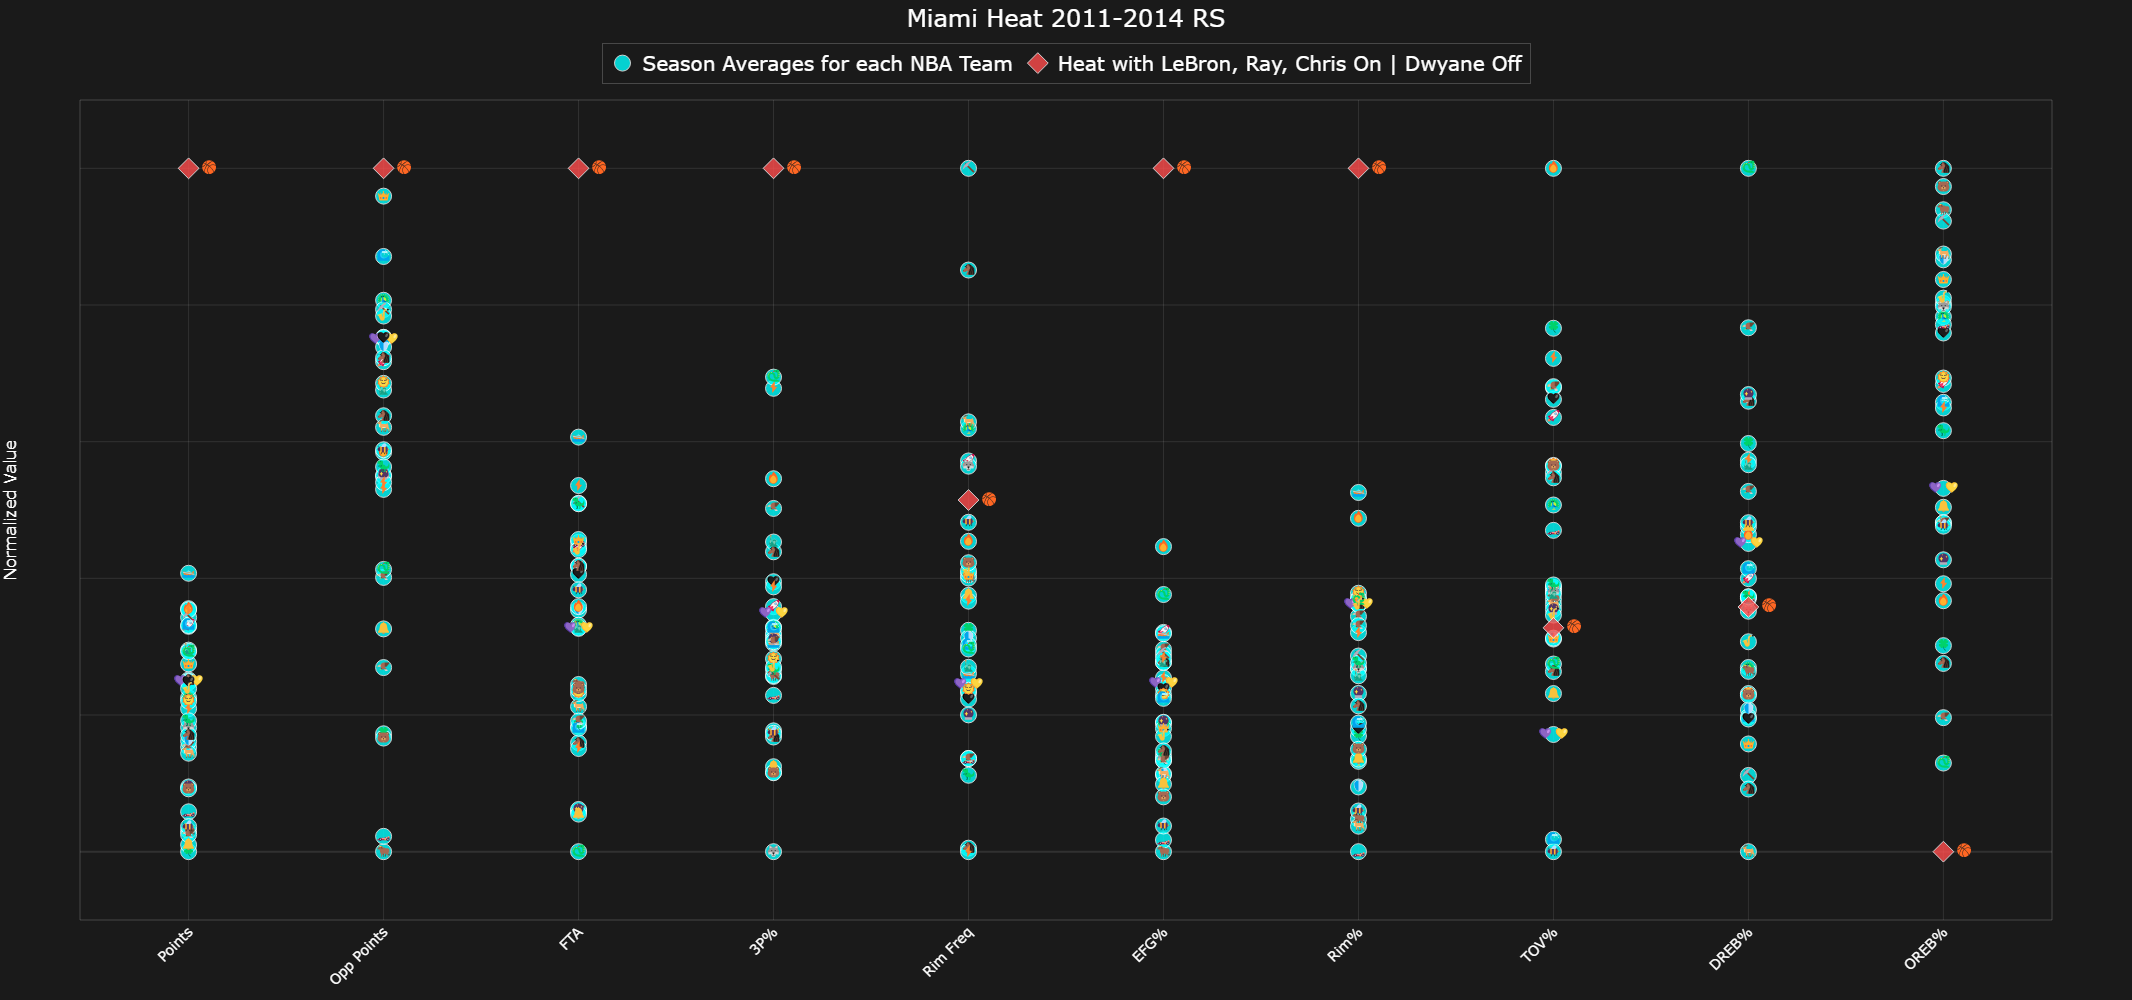

In [7]:
def create_nba_beeswarm(team, start_year, end_year, data, categories=None, vs=False, ps=False):
    # Existing team names dictionary remains the same
    team_names = {
        "PHX": "Phoenix Suns",
        "DET": "Detroit Pistons",
        "POR": "Portland Trail Blazers",
        "MIL": "Milwaukee Bucks",
        "BOS": "Boston Celtics",
        "LAL": "Los Angeles Lakers",
        "ORL": "Orlando Magic",
        "NOP": "New Orleans Pelicans",
        "DAL": "Dallas Mavericks",
        "DEN": "Denver Nuggets",
        "IND": "Indiana Pacers",
        "CHA": "Charlotte Hornets",
        "SAS": "San Antonio Spurs",
        "LAC": "Los Angeles Clippers",
        "MEM": "Memphis Grizzlies",
        "WAS": "Washington Wizards",
        "MIA": "Miami Heat",
        "ATL": "Atlanta Hawks",
        "OKC": "Oklahoma City Thunder",
        "UTA": "Utah Jazz",
        "NYK": "New York Knicks",
        "CHI": "Chicago Bulls",
        "MIN": "Minnesota Timberwolves",
        "BKN": "Brooklyn Nets",
        "CLE": "Cleveland Cavaliers",
        "HOU": "Houston Rockets",
        "GSW": "Golden State Warriors",
        "SAC": "Sacramento Kings",
        "TOR": "Toronto Raptors",
        "PHI": "Philadelphia 76ers"
    }
    # Add new dictionary for team symbols using basketball-related Unicode characters
    team_symbols = {
        "PHX": "🏀", "DET": "🏀", "POR": "🏀", "MIL": "🏀", "BOS": "🏀",
        "LAL": "🏀", "ORL": "🏀", "NOP": "🏀", "DAL": "🏀", "DEN": "🏀",
        "IND": "🏀", "CHA": "🏀", "SAS": "🏀", "LAC": "🏀", "MEM": "🏀",
        "WAS": "🏀", "MIA": "🏀", "ATL": "🏀", "OKC": "🏀", "UTA": "🏀",
        "NYK": "🏀", "CHI": "🏀", "MIN": "🏀", "BKN": "🏀", "CLE": "🏀",
        "HOU": "🏀", "GSW": "🏀", "SAC": "🏀", "TOR": "🏀", "PHI": "🏀"
    }

    addon = ''
    if ps:
        addon += ' PS '
    else:
        addon += ' RS '
    if vs:
        addon = ' (Defense)'
    
    team_name = team_names[team]
    combo_name = data[data.lineup_row == 1]['Name'].iloc[0]
    combo_name = team_name.split(' ')[-1] + ' with ' + combo_name
    team_name += (' ' + str(start_year-1) + '-' + str(end_year))
    
    # Normalize the data
    scaler = MinMaxScaler()
    normalized_data = pd.DataFrame(
        scaler.fit_transform(data[categories]),
        columns=categories,
        index=data.index
    )
    
    # Separate team and lineup data
    team_data = normalized_data[data['lineup_row'] == 0]
    lineup_data = normalized_data[data['lineup_row'] == 1]
    
    original_team_data = data[data['lineup_row'] == 0]
    original_lineup_data = data[data['lineup_row'] == 1]
    
    fig = go.Figure()
    
    # Define custom colors
    team_color = '#00ffff'
    lineup_color = '#ff4d4d'
    grid_color = 'rgba(255, 255, 255, 0.1)'
    bg_color = '#1a1a1a'
    text_color = '#ffffff'
    
    # Plot each category
    for i, category in enumerate(categories):
        # Plot team data points with team symbols
        fig.add_trace(go.Scatter(
            x=[category] * len(team_data),
            y=team_data[category],
            mode='markers+text',
            name='Season Averages for each NBA Team',
            marker=dict(
                size=16,
                color=team_color,
                opacity=0.8,
                line=dict(color='white', width=1),
                symbol='circle',
            ),
            text=[team_symbols.get(str(team_abbr), "🏀") for team_abbr in original_team_data['Name']],  # Add team symbols using Team column
            textposition='middle center',
            textfont=dict(
                size=12,
                color=team_color
            ),
            hovertemplate="<b>%{customdata}</b><br>" + category + ": %{customdata2:.1f}<br><extra></extra>",
            customdata=[[team_abbr, val] for team_abbr, val in 
                       zip(original_team_data['Name'], original_team_data[category])],
            showlegend=(i == 0)
        ))
        
        # Plot lineup data points
        fig.add_trace(go.Scatter(
            x=[category] * len(lineup_data),
            y=lineup_data[category],
            mode='markers+text',
            name=combo_name,
            marker=dict(
                size=16,
                color=lineup_color,
                opacity=0.8,
                line=dict(color='white', width=1),
                symbol='diamond'
            ),
            text=[f"{original_lineup_data.loc[lineup, category]:.1f}" 
                  for lineup in lineup_data.index],
            textposition='middle right',
            textfont=dict(
                color=text_color,
                size=14
            ),
            hovertemplate="<b>%{text}</b><br>Normalized: %{y:.2f}<br><extra></extra>",
            showlegend=(i == 0)
        ))
    
    # Layout remains the same
    fig.update_layout(
        title=dict(
            text=team_name + addon,
            font=dict(size=24, color=text_color),
            x=0.5,
            y=.99
        ),
        width=1350,
        height=1000,
        showlegend=True,
        plot_bgcolor=bg_color,
        paper_bgcolor=bg_color,
        yaxis=dict(
            title=dict(text='Normalized Value', font=dict(size=16, color=text_color)),
            gridcolor=grid_color,
            zeroline=True,
            zerolinecolor=grid_color,
            range=[-0.1, 1.1],
            tickformat='.2f',
            tickfont=dict(color=text_color),
            tickmode='linear',
            tick0=0,
            dtick=0.2,
            showticklabels=False
        ),
        xaxis=dict(
            gridcolor=grid_color,
            categoryorder='array',
            categoryarray=categories,
            tickfont=dict(color=text_color, size=14),
            tickangle=-45
        ),
        hovermode='closest',
        legend=dict(
            font=dict(color=text_color, size=20),
            bgcolor='rgba(0,0,0,0)',
            bordercolor='rgba(255,255,255,0.2)',
            borderwidth=1,
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="center",
            x=0.5
        ),
        margin=dict(t=100, b=80),
        shapes=[
            dict(
                type='rect',
                xref='paper',
                yref='paper',
                x0=0,
                y0=0,
                x1=1,
                y1=1,
                line=dict(color='rgba(255,255,255,0.2)', width=1),
                layer='below'
            )
        ]
    )
    
    return fig
    # Separate team and lineup data


vs=False
ps=False
start_year=2012
end_year=2014
players_on=['2544','951','2547']
players_off=[]
players_off=['2548']

team='MIA'
def graph_lineupsplits(start_year,end_year,players_on,players_off,team,vs,ps):
    team_id=team_dict(team)
    row=player_rows(start_year,end_year,players_on,players_off,team_id ,vs=vs)
    teams = team_averages(start_year,end_year,vs=vs,ps=ps)
    row = trim_frame(row)
    
    teams=trim_frame(teams)
    row['lineup_row']=1

    teams['lineup_row']=0
    
    data=pd.concat([teams,row])
    columns = [
                'Points', 'Opp Points', 'FTA',
                '3P%',
                'Rim Freq', 'EFG%',
                'Rim%',  'TOV%',
              
                'DREB%', 'OREB%']
    exclude=['Points', 'Opp Points',  '3P Assists','Rim Assists','FTA']
    for col in columns:
        if col not in exclude:
            data[col]*=100
    print(data.columns)
    fig = create_nba_beeswarm(team,start_year,end_year,data,categories=columns,vs=vs,ps=ps)
    return fig

fig= graph_lineupsplits(start_year,end_year,players_on,players_off,team,vs,ps)

fig.show()


In [3]:


df = pd.read_csv('index_master.csv')

teammap=dict(zip(df['team'],df['team_id']))
teammap
teammap['CHA']=teammap['CHO']
teammap['PHX']=teammap['PHO']
teammap

{'SYR': '1610612755',
 'PHW': '1610612744',
 'NYK': '1610612752',
 'STL': '1610612737',
 'ROC': '1610612758',
 'BOS': '1610612738',
 'FTW': '1610612765',
 'MNL': '1610612747',
 'TOT': 'TOT',
 'DET': '1610612765',
 'CIN': '1610612758',
 'LAL': '1610612747',
 'CHP': '1610612741',
 'SFW': '1610612744',
 'CHZ': '1610612741',
 'BAL': '1610612764',
 'PHI': '1610612755',
 'CHI': '1610612741',
 'SDR': '1610612745',
 'SEA': '1610612760',
 'MIL': '1610612749',
 'ATL': '1610612737',
 'PHO': '1610612756',
 'POR': '1610612757',
 'CLE': '1610612739',
 'BUF': '1610612761',
 'HOU': '1610612745',
 'GSW': '1610612744',
 'KCO': '1610612758',
 'CAP': '1610612764',
 'NOJ': '1610612762',
 'WSB': '1610612764',
 'KCK': '1610612758',
 'IND': '1610612754',
 'NYN': '1610612751',
 'DEN': '1610612743',
 'SAS': '1610612759',
 'NJN': '1610612751',
 'SDC': '1610612746',
 'UTA': '1610612762',
 'DAL': '1610612742',
 'LAC': '1610612746',
 'SAC': '1610612758',
 'CHH': '1610612766',
 'MIA': '1610612748',
 'ORL': '16106127